In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("FA-KES-Dataset.csv", encoding='latin-1')

In [ ]:
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [ ]:
df.tail()

,unit_id,article_title,article_content,source,date,location,labels
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1
803,1965511231,Syrian Army Kills 48 ISIL Terrorists in Deir E...,April 6 2017 Syrian Army Kills 48 ISIL Terrori...,manar,4/4/2017,deir ezzor,1


In [ ]:
df.shape

(804, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_id,804.0,1.936024e+09,1.876968e+07,1.914948e+09,1.923848e+09,1.924058e+09,1.962496e+09,1.965511e+09
labels,804.0,5.298507e-01,4.994188e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

,0
unit_id,0
article_title,0
article_content,0
source,0
date,0
location,0
labels,0


In [ ]:
df.dtypes

,0
unit_id,int64
article_title,object
article_content,object
source,object
date,object
location,object
labels,int64


In [ ]:
df=df[["labels","unit_id"]].rename(columns={'labels':'Class','unit_id':'News'})
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)



In [ ]:
df['Class'].value_counts()



,count
Class,
1,425
0,376


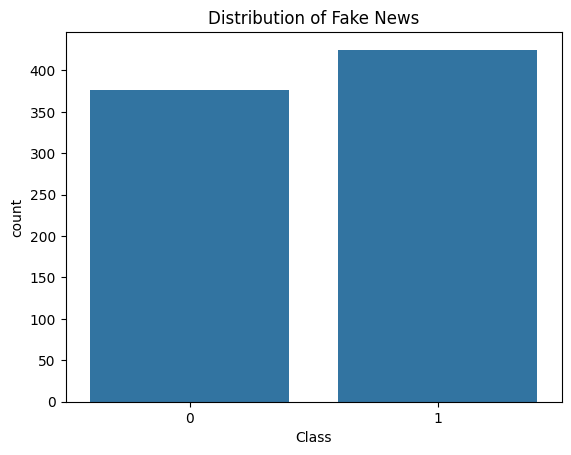

In [ ]:
#Bar Charts (for categorical variables):
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Distribution of Fake News')
plt.show()


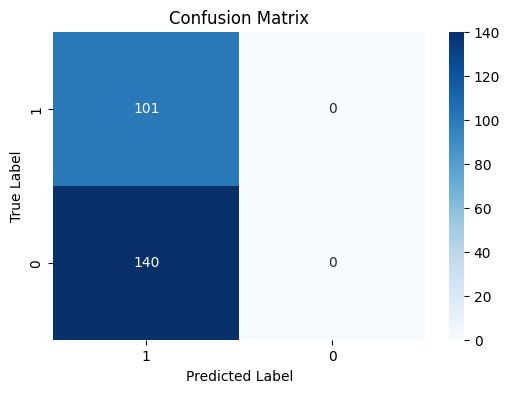

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of X_train: (560, 1)
Shape of X_test: (241, 1)
Shape of y_train: (560,)
Shape of y_test: (241,)


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the base estimator (Decision Tree)
base_estimator_dt = DecisionTreeClassifier(random_state=42)

# Initialize and train the Bagging Classifier with the base estimator
bagging_model_dt = BaggingClassifier(estimator=base_estimator_dt, n_estimators=10, random_state=42)
bagging_model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging_dt = bagging_model_dt.predict(X_test)

# Calculate evaluation metrics
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
precision_bagging_dt = precision_score(y_test, y_pred_bagging_dt)
recall_bagging_dt = recall_score(y_test, y_pred_bagging_dt)
f1_bagging_dt = f1_score(y_test, y_pred_bagging_dt)

# Display the metrics
print(f"Bagging with Decision Tree Accuracy: {accuracy_bagging_dt:.4f}")
print(f"Bagging with Decision Tree Precision: {precision_bagging_dt:.4f}")
print(f"Bagging with Decision Tree Recall: {recall_bagging_dt:.4f}")
print(f"Bagging with Decision Tree F1-score: {f1_bagging_dt:.4f}")

Bagging with Decision Tree Accuracy: 0.5809
Bagging with Decision Tree Precision: 0.5809
Bagging with Decision Tree Recall: 1.0000
Bagging with Decision Tree F1-score: 0.7349


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=10, random_state=42)

# Initialize and train the Bagging Classifier with the base estimator
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate evaluation metrics
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)

# Display the metrics
print(f"Bagging with Random Forest Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging with Random Forest Precision: {precision_bagging:.4f}")
print(f"Bagging with Random Forest Recall: {recall_bagging:.4f}")
print(f"Bagging with Random Forest F1-score: {f1_bagging:.4f}")

Bagging with Random Forest Accuracy: 0.5809
Bagging with Random Forest Precision: 0.5809
Bagging with Random Forest Recall: 1.0000
Bagging with Random Forest F1-score: 0.7349


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the base estimator (Decision Tree)
base_estimator_ada = DecisionTreeClassifier(max_depth=1, random_state=42) # AdaBoost often uses shallow trees

# Initialize and train the AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=base_estimator_ada, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Display the metrics
print(f"AdaBoost with Decision Tree Accuracy: {accuracy_adaboost:.4f}")
print(f"AdaBoost with Decision Tree Precision: {precision_adaboost:.4f}")
print(f"AdaBoost with Decision Tree Recall: {recall_adaboost:.4f}")
print(f"AdaBoost with Decision Tree F1-score: {f1_adaboost:.4f}")

AdaBoost with Decision Tree Accuracy: 0.5809
AdaBoost with Decision Tree Precision: 0.5809
AdaBoost with Decision Tree Recall: 1.0000
AdaBoost with Decision Tree F1-score: 0.7349


Now, let's compare the metrics:

| Metric    | Bagging (Decision Tree) | Bagging (Random Forest) | AdaBoost (Decision Tree) |
|-----------|-------------------------|-------------------------|--------------------------|
| Accuracy  | {accuracy_bagging_dt:.4f}        | {accuracy_bagging:.4f}           | {accuracy_adaboost:.4f}           |
| Precision | {precision_bagging_dt:.4f}        | {precision_bagging:.4f}          | {precision_adaboost:.4f}          |
| Recall    | {recall_bagging_dt:.4f}         | {recall_bagging:.4f}            | {recall_adaboost:.4f}             |
| F1-score  | {f1_bagging_dt:.4f}         | {f1_bagging:.4f}            | {f1_adaboost:.4f}             |